 Written by Federica B. Bianco @fedhere
UDel DSPS

**Work Completed by Dakota Neumann**

The seed used for each distribution is 512

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [13]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
import numpy as np
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq','lnorm','pois','binom','cauchy']


## and which *population* mean to give it (it will be the same for each distribution)

In [4]:
mymean = 250

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [5]:
# the chi sq distribution takes the number of degrees of freedom, 
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution of 100 elements

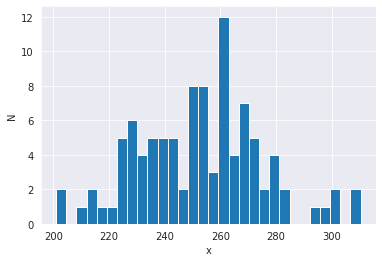

In [18]:

np.random.seed(512)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [41]:
print(type(mydists['chisq'][100]))

<class 'numpy.ndarray'>


In [42]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 252.78, standard deviation: 22.27


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes 

In [43]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


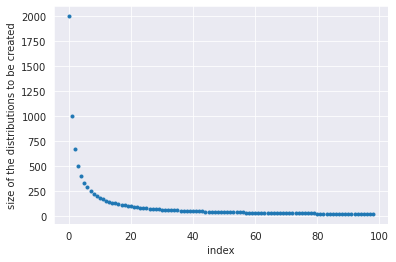

In [44]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

Text(1259.3999999999999, 100, 'expected mean')

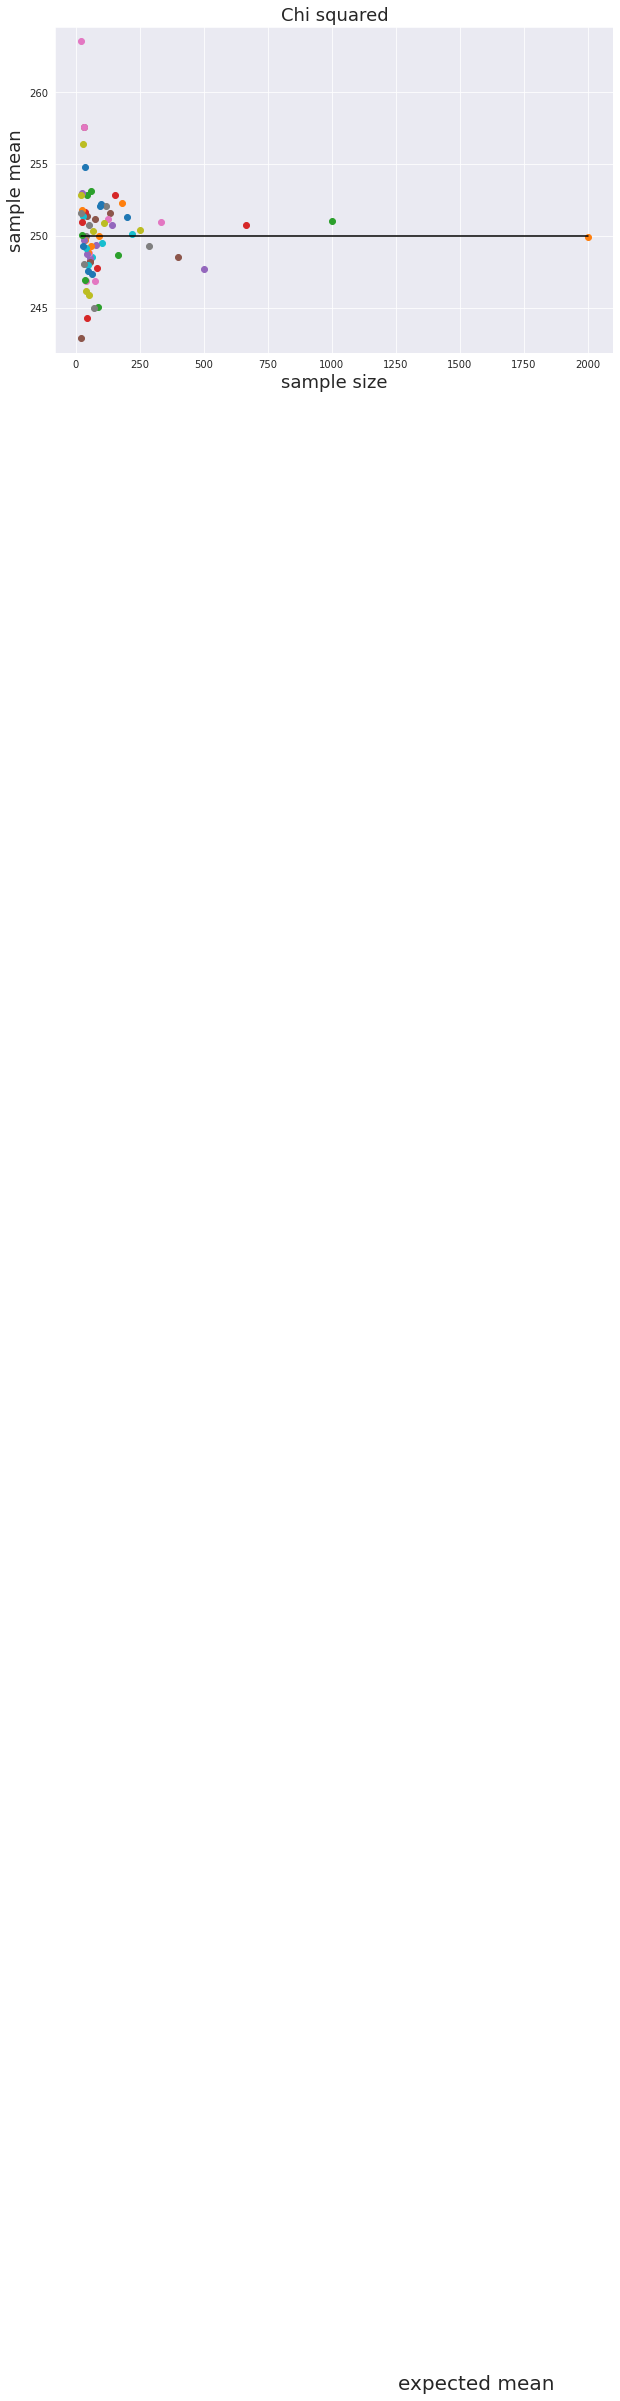

In [57]:
np.random.seed(512)
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:

    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 2: [describe what you see and how it relates to the law of large numbers]

What I see are the means of 100 different chisq distributions with different sample sizes. I set the true population mean to be 250, and, in agreement with the law of large numbers, the distributions with larger sample sizes had sample means that were closer to the population mean.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'N')

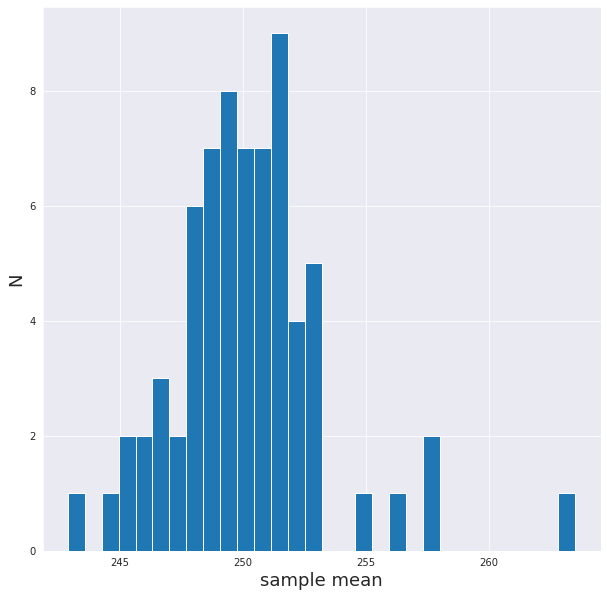

In [55]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: [...]

# Do it for the Normal distribution


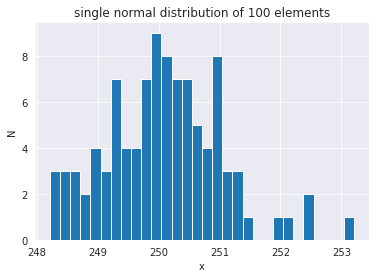

In [89]:
np.random.seed(512)
mydists = {}
mydists['lnorm'] = {}
mydists['lnorm'][100] = np.random.normal(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['lnorm'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['lnorm'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("single normal distribution of 100 elements");

In [90]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


In [91]:
print ("Lnorm mean: %.2f, standard deviation: %.2f"%(mydists['lnorm'][100].mean(), mydists['lnorm'][100].std()))

Lnorm mean: 250.07, standard deviation: 0.96


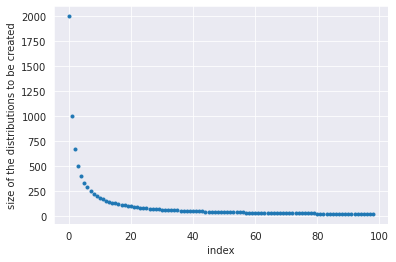

In [92]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

TypeError: ignored

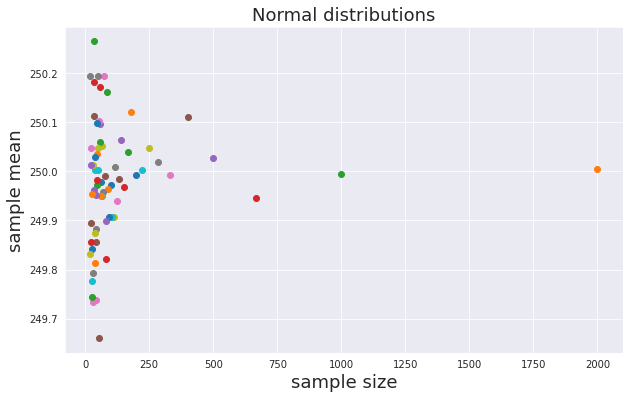

In [93]:
np.random.seed(512)
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:

    mydists['lnorm'][n] = np.random.normal(mymean, size = n)
    
# save the means for plotting later    

mydists['lnorm']['means'] = {}
# prepare the figure
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['lnorm']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['lnorm']['means'][nn] = mydists['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, mydists['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
axlnorm_mu_n.set_title('Normal distributions', fontsize=18)
axlnorm_mu_n.plot([min(0), max(2000)], mymean);
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);

As seen in this, the results of normal distributions follows the law of large numbers in the same way that the Chi-squared distribution does. such that as the sample size increases, the mean of the distribution approaches 250.

Text(0.5, 1.0, 'Frequency of means out of 100 normal distributions')

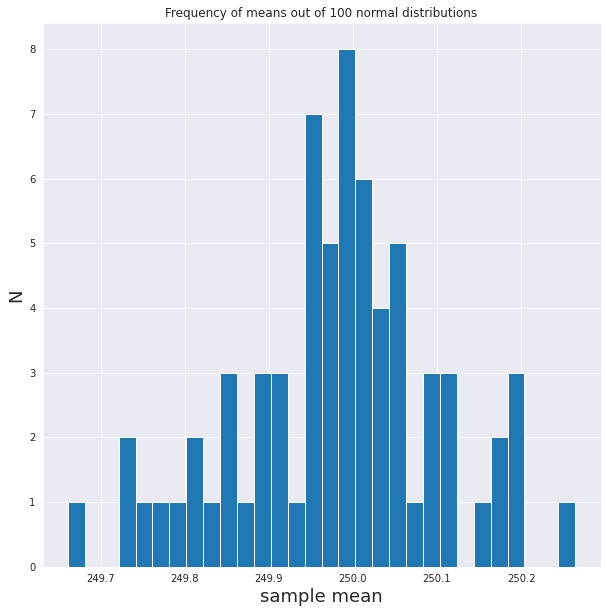

In [95]:
allmeans = list(mydists['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of means out of 100 normal distributions")

# Do it for the Poisson distribution

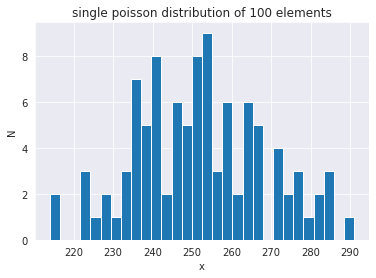

In [96]:
np.random.seed(512)
mydists = {}
mydists['pois'] = {}
mydists['pois'][100] = np.random.poisson(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'pois'
# mydists['pois'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['pois'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("single poisson distribution of 100 elements");

In [97]:
print ("Pois mean: %.2f, standard deviation: %.2f"%(mydists['pois'][100].mean(), mydists['pois'][100].std()))

Pois mean: 252.09, standard deviation: 16.44


ValueError: ignored

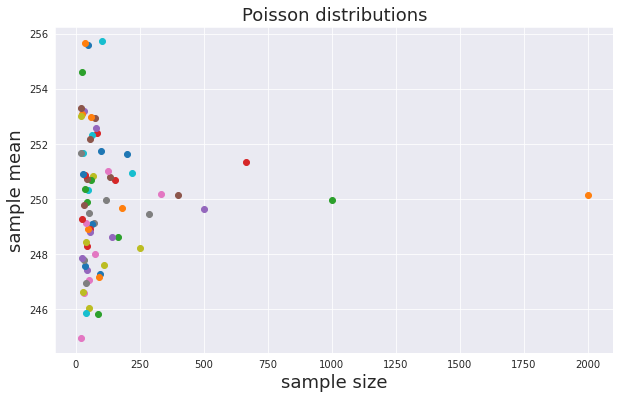

In [98]:
np.random.seed(512)
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:

    mydists['pois'][n] = np.random.poisson(mymean, size = n)
    
# save the means for plotting later    

mydists['pois']['means'] = {}
# prepare the figure
axlpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['pois']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['pois']['means'][nn] = mydists['pois'][nn].mean()
        #and plot it
        axlpois_mu_n.plot(nn, mydists['pois']['means'][nn], 'o')
        axlpois_mu_n.set_xlabel('sample size', fontsize=18)
        axlpois_mu_n.set_ylabel('sample mean', fontsize=18)
axlpois_mu_n.set_title('Poisson distributions', fontsize=18)
axlpois_mu_n.plot([min(mysize), max(mysize)], mymean); #ignore the error in from this line
axlpois_mu_n.text(axlpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);

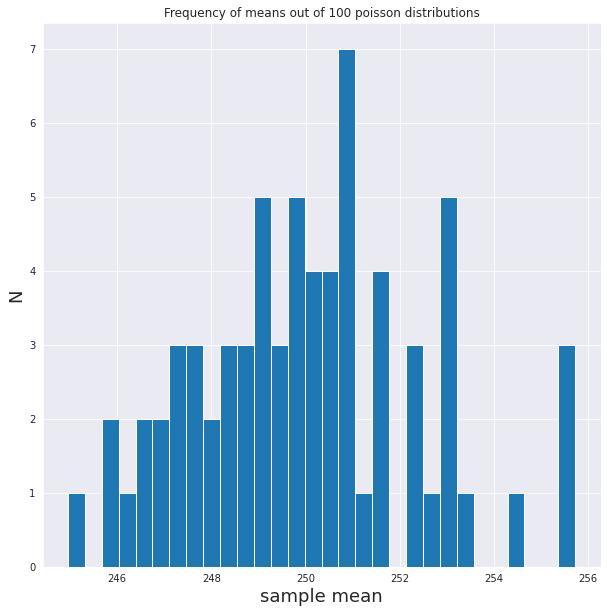

In [100]:
allmeans = list(mydists['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of means out of 100 poisson distributions");

# Do it for the Binomial distribution

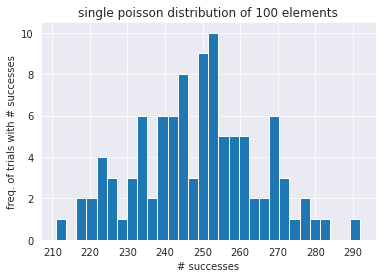

In [111]:
np.random.seed(512)
mydists = {}
mydists['binom'] = {}
mydists['binom'][100] = np.random.binomial(1000,mymean/1000, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'binom'
# mydists['binom'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['binom'][100], bins = 30)
pl.ylabel('freq. of trials with # successes')
pl.xlabel('# successes');
pl.title("single poisson distribution of 100 elements");

In [112]:
print ("Binom mean: %.2f, standard deviation: %.2f"%(mydists['binom'][100].mean(), mydists['binom'][100].std()))

Binom mean: 248.69, standard deviation: 16.10


ValueError: ignored

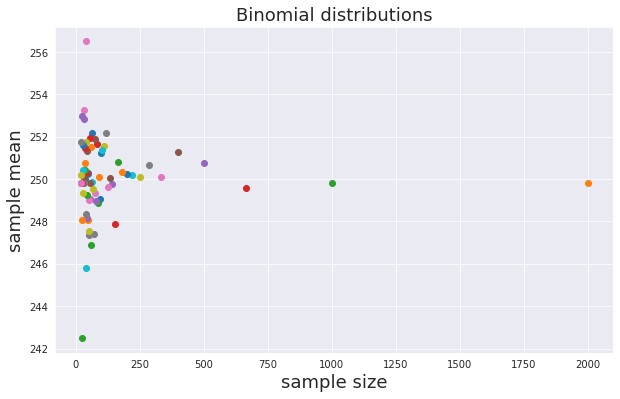

In [116]:
np.random.seed(512)
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:

    mydists['binom'][n] = np.random.binomial(1000,mymean/1000, size = n)
    
# save the means for plotting later    

mydists['binom']['means'] = {}
# prepare the figure
axlbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binom']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['binom']['means'][nn] = mydists['binom'][nn].mean()
        #and plot it
        axlbinom_mu_n.plot(nn, mydists['binom']['means'][nn], 'o')
        axlbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axlbinom_mu_n.set_ylabel('sample mean', fontsize=18)
axlbinom_mu_n.set_title('Binomial distributions', fontsize=18)
axlbinom_mu_n.plot([min(mysize), max(mysize)], mymean); #ignore the error in from this line
axlbinom_mu_n.text(axlbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);

The way I did this was by assuming there were 100 binomial distributions, each sample in each distribution had 1000 trials and each one having a 25% chance at being successful, which would make the population mean 250, just like the other distributions. Based on the plot above, it is clear that the law of large numbers is maintained.

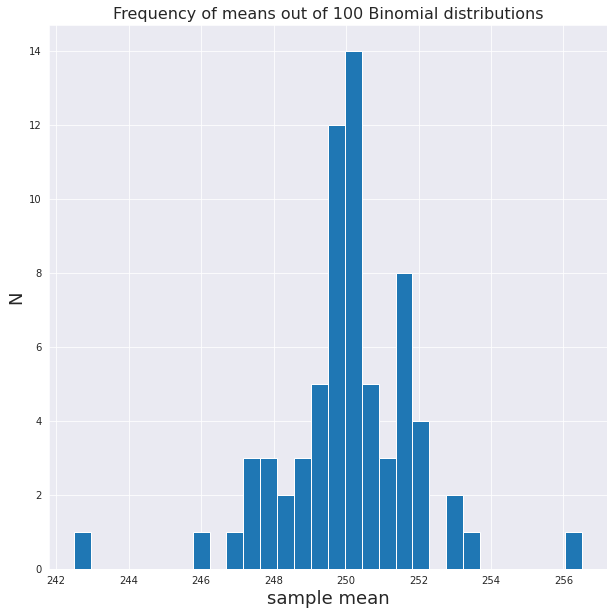

In [118]:
allmeans = list(mydists['binom']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of means out of 100 Binomial distributions", fontsize = 16);

# Do it for Cauchy distribution

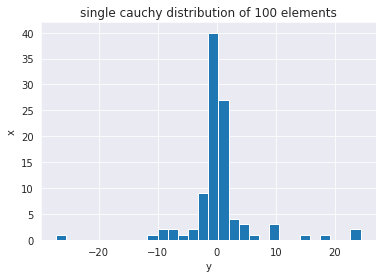

In [121]:
np.random.seed(512)
mydists = {}
mydists['cauchy'] = {}
mydists['cauchy'][100] = np.random.standard_cauchy(100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'binom'
# mydists['binom'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['cauchy'][100], bins = 30)
pl.ylabel('x')
pl.xlabel('y');
pl.title("single cauchy distribution of 100 elements");

In [122]:
print ("Cauchy mean: %.2f, standard deviation: %.2f"%(mydists['cauchy'][100].mean(), mydists['cauchy'][100].std()))

Cauchy mean: 0.49, standard deviation: 5.84


ValueError: ignored

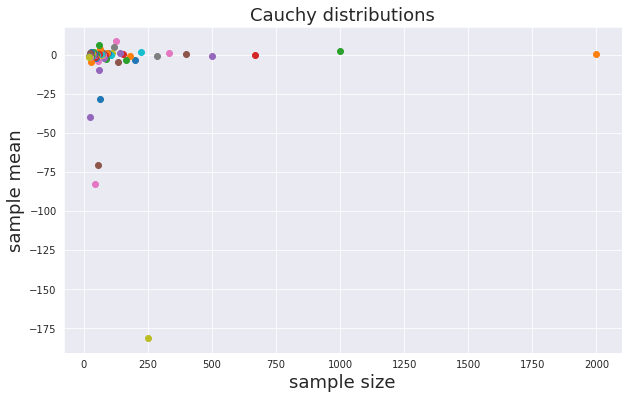

In [128]:
np.random.seed(512)
# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:

    mydists['cauchy'][n] = np.random.standard_cauchy(size = n) 
    
# save the means for plotting later    

mydists['cauchy']['means'] = {}
# prepare the figure
axlcauchy_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['cauchy']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['cauchy']['means'][nn] = mydists['cauchy'][nn].mean()
        #and plot it
        axlcauchy_mu_n.plot(nn, mydists['cauchy']['means'][nn], 'o')
        axlcauchy_mu_n.set_xlabel('sample size', fontsize=18)
        axlcauchy_mu_n.set_ylabel('sample mean', fontsize=18)
axlcauchy_mu_n.set_title('Cauchy distributions', fontsize=18)
axlcauchy_mu_n.plot([-200, 200], mymean); #ignore the error in from this line
axlcauchy_mu_n.text(axlcauchy_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20);


Even though it is clearly skewed towards negative values between sample sizes of less than or equal to 250, **this is the result of randomness from the seed!** I found this out by testing the same plot with different seeds, and got less bizzar looking plots.

While it may initially appear that the Cauchy distribution follows the law of large numbers, it actually doesn't. This is because the population median is 0, but the population mean is undefined, so regardless of what the means of the distributions approach as the sample size increases, it is not any closer to a population mean.

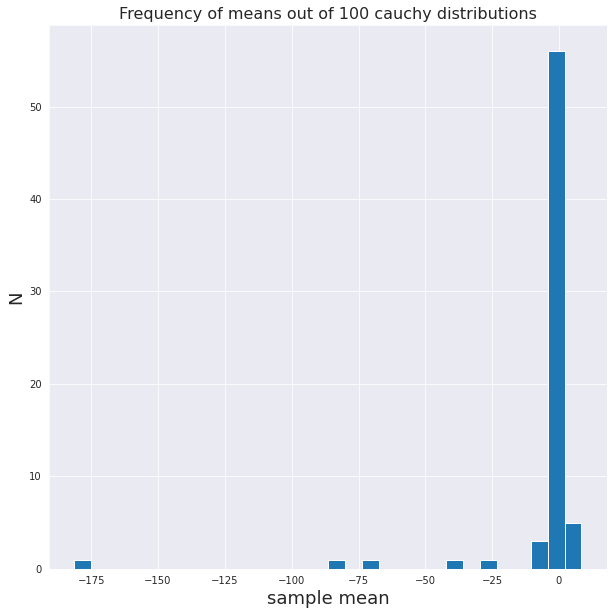

In [125]:
allmeans = list(mydists['cauchy']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of means out of 100 cauchy distributions", fontsize = 16);

This is skewed towards negative values specifically because of the random generation from the seed! try any other seed for the previous steps in the cauchy dist. analysis and you will see this!